***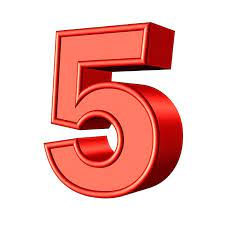***

# ***K-means  versus K-medoids***


## ***K-means***







In [144]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [145]:
wine=load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [146]:
x=wine.data

In [147]:
df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Text(0, 0.5, 'malic_acid')

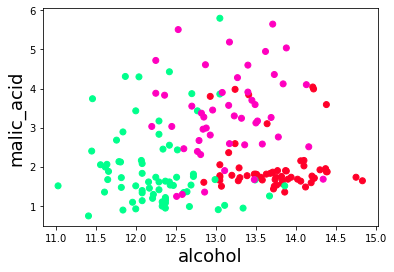

In [148]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow')

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [149]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
y = kmeans.fit_predict(x)

In [150]:
print("K-Means Cluster Centers")
print(kmeans.cluster_centers_)
print("Cluster Labels")
print(kmeans.labels_)

K-Means Cluster Centers
[[1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]]
Cluster Labels
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2

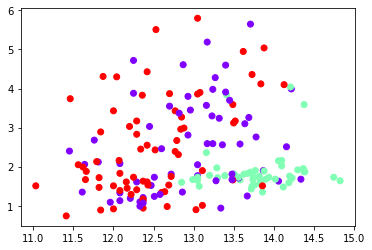

In [151]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=kmeans.labels_, cmap='rainbow')
plt.show()

Text(0.5, 1.0, 'Predicted')

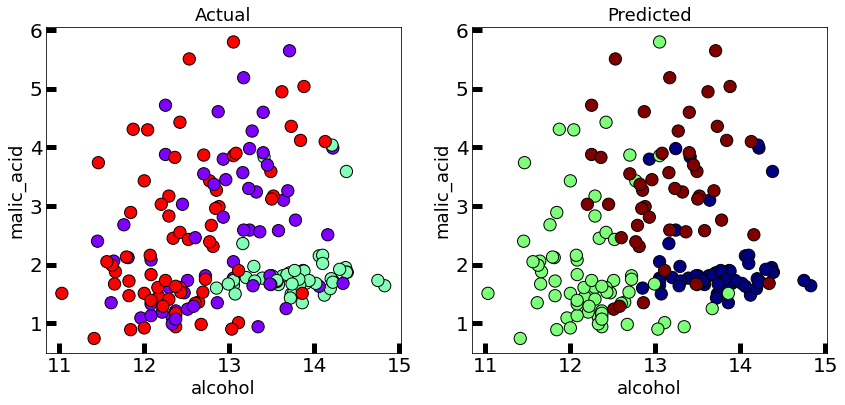

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [153]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmeans.labels_)

The silhouette score is :


0.5711381937868844

In [154]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :  ")
calinski_harabasz_score(x, kmeans.labels_)

The calinski harabasz score is :  


561.815657860671

In [155]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :  ")
davies_bouldin_score(x, kmeans.labels_)

The davies bouldin score is :  


0.5342431775436273


## ***K-medoids***

In [157]:
!pip install scikit-learn-extra

In [158]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris

In [159]:
wine=load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [160]:
x=wine.data

In [161]:

df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Text(0, 0.5, 'malic_acid')

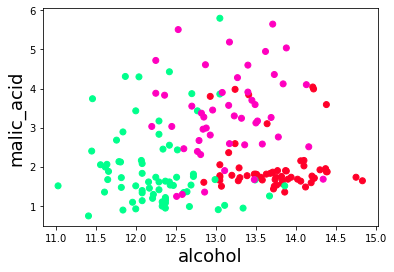

In [162]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow')

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [163]:
kmedoid = KMedoids(init="heuristic", n_clusters=3, max_iter=300, random_state=42)
y = kmedoid.fit_predict(x)

In [164]:
print("K-Medoids Cluster Centers")
print(kmedoid.cluster_centers_)
print("Cluster Labels")
print(kmedoid.labels_)

K-Medoids Cluster Centers
[[1.260e+01 2.460e+00 2.200e+00 1.850e+01 9.400e+01 1.620e+00 6.600e-01
  6.300e-01 9.400e-01 7.100e+00 7.300e-01 1.580e+00 6.950e+02]
 [1.349e+01 1.660e+00 2.240e+00 2.400e+01 8.700e+01 1.880e+00 1.840e+00
  2.700e-01 1.030e+00 3.740e+00 9.800e-01 2.780e+00 4.720e+02]
 [1.383e+01 1.570e+00 2.620e+00 2.000e+01 1.150e+02 2.950e+00 3.400e+00
  4.000e-01 1.720e+00 6.600e+00 1.130e+00 2.570e+00 1.130e+03]]
Cluster Labels
[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 2 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


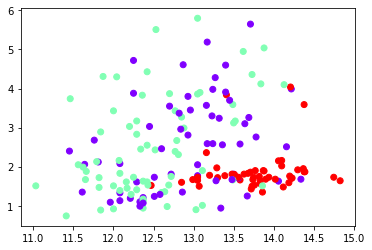

In [165]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=kmedoid.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

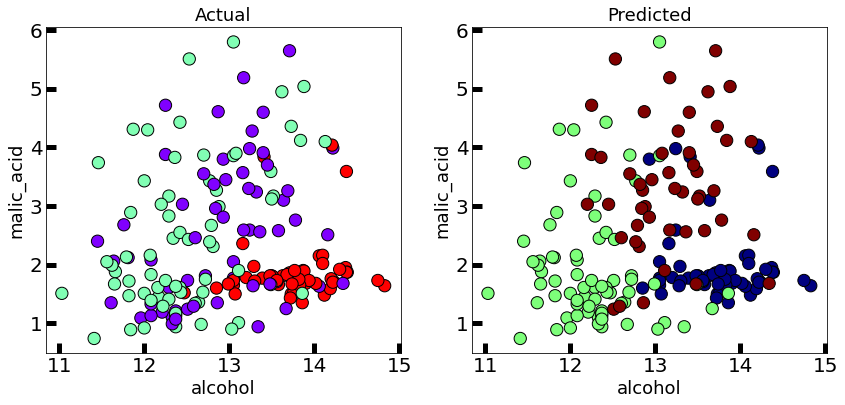

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [167]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmedoid.labels_)

The silhouette score is :


0.5666480408636575

In [168]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmedoid.labels_)

The calinski harabasz score is :


539.3792353535451

In [169]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmedoid.labels_)

The davies bouldin score is :


0.529239412600317

In [170]:
print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmedoid.inertia_)



# Finding the overall centroid of the data points
centers = kmedoid.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmedoid.inertia_)

It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
16376.969320536637
The value of SSB is: 
-16243.642776092192


# ***DBSCAN versus OPTICS***

## ***DBSCAN***

In [171]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [172]:
wine=load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [173]:
x=wine.data

Text(0, 0.5, 'malic_acid')

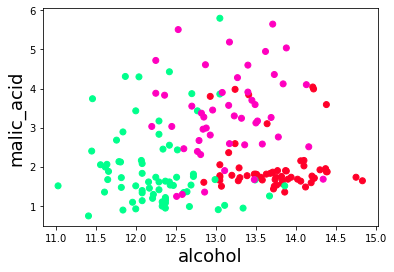

In [174]:
df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [175]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=35, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(x)

In [176]:
print("Cluster Labels")
print(dbscan.labels_)

Cluster Labels
[ 0  0 -1 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  3  1  1  0  0
  3  3 -1  2  3  0  2 -1  0  2  0  3  3  0  0  1  1  0  0  1  3  0  0  0
  0  2  0  2 -1 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1 -1  3  1
  1 -1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  3  3  1]


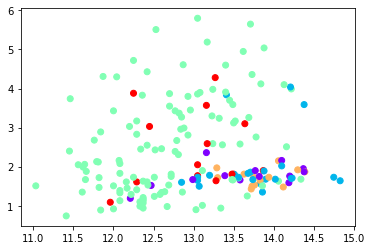

In [177]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=dbscan.labels_, cmap='rainbow')
plt.show()

Text(0.5, 1.0, 'Predicted')

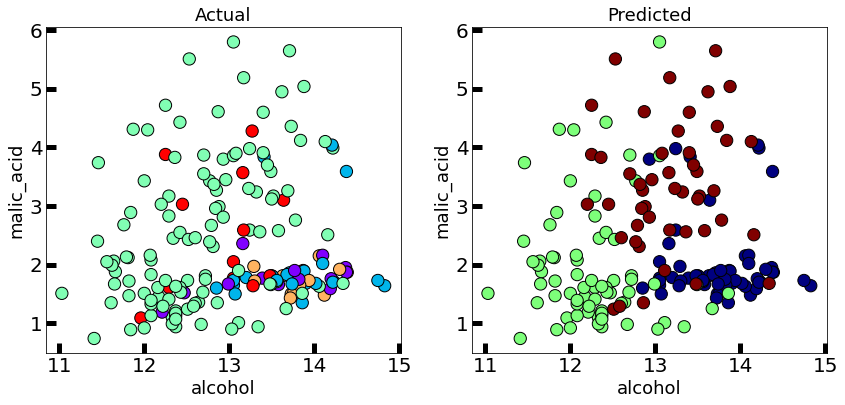

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150)
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [179]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :  ")
silhouette_score(x, dbscan.labels_)

The silhouette score is :  


0.4413295944891938

In [180]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, dbscan.labels_)

The calinski harabasz score is :


208.9449395725058

In [181]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, dbscan.labels_)

The davies bouldin score is :


7.812129203041904

## ***OPTICS***

In [182]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

Text(0, 0.5, 'malic_acid')

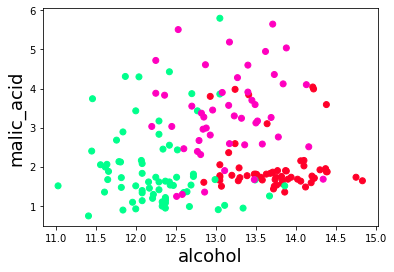

In [183]:
wine=load_wine()
wine

x=wine.data

df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [184]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=35, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(x)

In [185]:
print("Cluster Labels")
print(dbscan.labels_)


Cluster Labels
[ 0  0 -1 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  3  1  1  0  0
  3  3 -1  2  3  0  2 -1  0  2  0  3  3  0  0  1  1  0  0  1  3  0  0  0
  0  2  0  2 -1 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1 -1  3  1
  1 -1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  3  3  1]


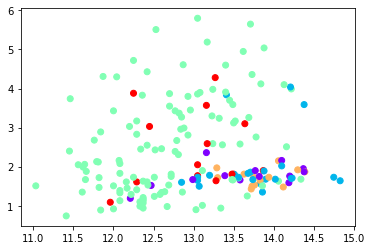

In [186]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=dbscan.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()


Text(0.5, 1.0, 'Predicted')

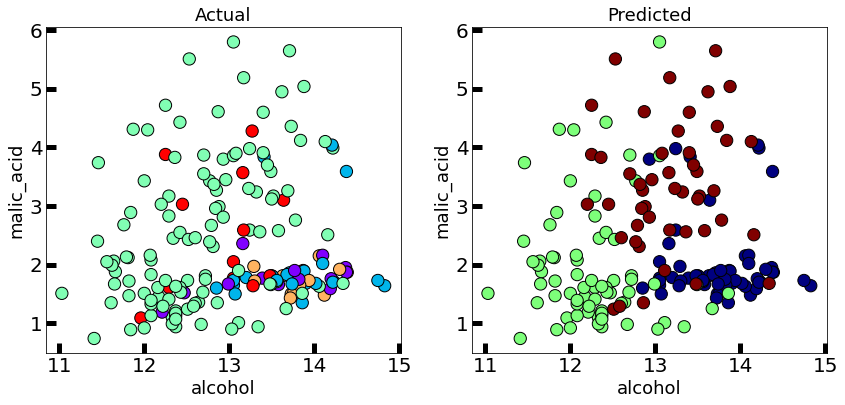

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150)
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [188]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, dbscan.labels_)

The silhouette score is :


0.4413295944891938

In [189]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, dbscan.labels_)

The calinski harabasz score is :


208.9449395725058

In [190]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, dbscan.labels_)

The davies bouldin score is :


7.812129203041904